In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
fraud_data = pd.read_csv('creditcard.csv')
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


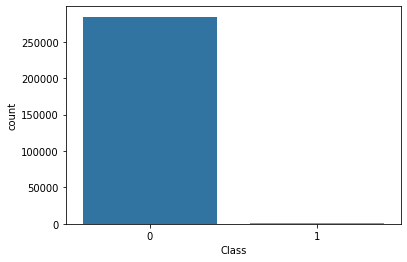

In [4]:
sns.countplot(fraud_data['Class'])

In [5]:
fraud_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
fruad = fraud_data[fraud_data['Class']==1]
Not_fruad =fraud_data[fraud_data['Class']==0][:500]

In [7]:
new_fraud = pd.concat([fruad,Not_fruad])

In [8]:
new_fraud.head()
new_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 541 to 499
Data columns (total 31 columns):
Time      992 non-null float64
V1        992 non-null float64
V2        992 non-null float64
V3        992 non-null float64
V4        992 non-null float64
V5        992 non-null float64
V6        992 non-null float64
V7        992 non-null float64
V8        992 non-null float64
V9        992 non-null float64
V10       992 non-null float64
V11       992 non-null float64
V12       992 non-null float64
V13       992 non-null float64
V14       992 non-null float64
V15       992 non-null float64
V16       992 non-null float64
V17       992 non-null float64
V18       992 non-null float64
V19       992 non-null float64
V20       992 non-null float64
V21       992 non-null float64
V22       992 non-null float64
V23       992 non-null float64
V24       992 non-null float64
V25       992 non-null float64
V26       992 non-null float64
V27       992 non-null float64
V28       992 non-null fl

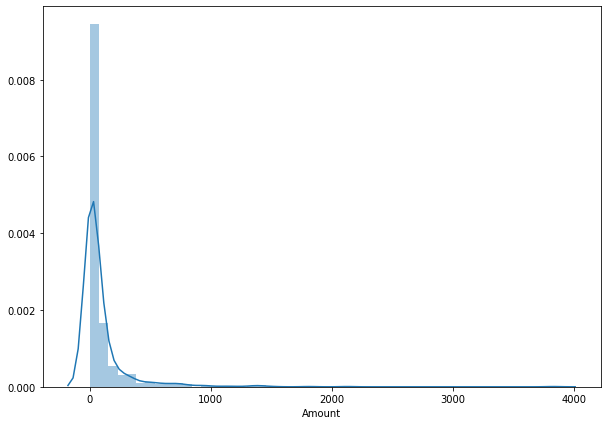

In [9]:
plt.figure(figsize=(10,7))
sns.distplot(new_fraud['Amount'],)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
Sdtd = StandardScaler()

In [12]:
new_fraud['Std_time']= Sdtd.fit_transform(new_fraud['Time'].values.reshape(-1,1))
new_fraud['Std_Amount']= Sdtd.fit_transform(new_fraud['Amount'].values.reshape(-1,1))

In [13]:
new_fraud.drop(['Time','Amount'],axis=1,inplace = True)

In [14]:
new_fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Std_time,Std_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.756905,-0.400422
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,-0.755648,1.811749
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,-0.679636,0.602917
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.631552,-0.153696
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.621398,-0.396240


In [15]:
from sklearn.utils import shuffle

In [16]:
shuffle(new_fraud,random_state = 5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Std_time,Std_Amount
479,-1.088458,1.197103,1.293719,-1.176453,-0.859955,-1.476075,0.308254,0.196454,0.542925,-0.032406,...,-0.252379,0.082766,0.929139,-0.251994,0.675392,0.093528,-0.093286,0,-0.757896,-0.390762
145800,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,-0.133950,...,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,1,0.896622,1.486698
316,1.105768,0.333012,0.184148,1.276948,-0.078118,-0.810949,0.459330,-0.170552,-0.290557,-0.000205,...,-0.910370,0.149046,0.348783,0.322330,-0.671069,0.005913,0.028252,0,-0.760296,-0.210987
102446,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1,0.534753,-0.396240
14338,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,-0.369909,...,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,1,-0.280256,-0.384699
244004,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,-1.528448,-2.325113,...,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1,2.134214,-0.396240
234705,-2.219219,0.727831,-5.458230,5.924850,3.932464,-3.085984,-1.677870,0.865075,-3.177260,-3.419207,...,-0.817343,-0.028752,0.025723,-0.825835,-0.013089,0.413291,-0.131387,1,2.056278,-0.400422
473,-0.343986,0.539789,1.024662,-0.371899,1.037336,1.261849,0.473409,0.227169,0.248279,-0.086236,...,0.170232,-0.415083,-1.659553,-0.054849,0.455438,0.201538,-0.054236,0,-0.758010,-0.383737
6472,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,-3.955812,...,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1,-0.617187,-0.396240
152295,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,-15.231833,...,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1,1.087758,-0.359357


In [17]:
from sklearn.model_selection import train_test_split
X = new_fraud.drop('Class',axis=1).values
y =new_fraud['Class'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [20]:
classifier = {'Logistic_Regression':LogisticRegression(),
              'SVC':SVC(),
              'Decision_Tree_Classifier':DecisionTreeClassifier(),
              'KNeighbors_Classifier': KNeighborsClassifier(),
              'RandomForestClassifier':RandomForestClassifier()}                    

In [22]:
for key,classifier in classifier.items():
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))   
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\kanis\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kanis\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kanis\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kanis\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kanis\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

[[153   3]
 [  1 141]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       156
           1       0.98      0.99      0.99       142

    accuracy                           0.99       298
   macro avg       0.99      0.99      0.99       298
weighted avg       0.99      0.99      0.99       298

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
[[148   8]
 [  6 136]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       156
           1       0.94      0.96      0.95       142

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298

Classifiers:  SVC Has a training score of 96.0 % accuracy score
[[156   0]
 [  0 142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00  

C:\Users\kanis\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
